In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [68]:
#Let's read the data
df = pd.read_csv('inc_occ_gender.csv', na_values = 'Na')

In [69]:
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Legislators,8,NaN,5,NaN,4,NaN


In [70]:
df.shape

(558, 7)

In [71]:
df.count()

Occupation     558
All_workers    558
All_weekly     322
M_workers      558
M_weekly       232
F_workers      558
F_weekly       192
dtype: int64

In [72]:
df.isnull().sum()

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [73]:
#Need to drop all NaN values since they will contribute nothing to the analysis
df = df.dropna().reset_index(drop=True) #Drop = True term drops the old index column and replaces it with a new one

In [74]:
df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0
4,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0


In [75]:
df.isnull().sum()

Occupation     0
All_workers    0
All_weekly     0
M_workers      0
M_weekly       0
F_workers      0
F_weekly       0
dtype: int64

In [76]:
#No more null values!
#We should also have a different size data frame, obviously
df.shape

(142, 7)

In [77]:
#Now I'm going to make a dataframe with the specific job sectors, the ones in all caps

sectors = []

for i in range(df.count()['Occupation']):
    x = df['Occupation'][i]
    if x.isupper():
        sectors.append(x)
   

In [78]:
sectors

['ALL OCCUPATIONS',
 'MANAGEMENT',
 'BUSINESS',
 'COMPUTATIONAL',
 'ENGINEERING',
 'SCIENCE',
 'SOCIAL SERVICE',
 'LEGAL',
 'EDUCATION',
 'ARTS',
 'HEALTHCARE PROFESSIONAL',
 'HEALTHCARE SUPPORT',
 'PROTECTIVE SERVICE',
 'CULINARY',
 'GROUNDSKEEPING',
 'SERVICE',
 'SALES',
 'OFFICE',
 'AGRICULTURAL',
 'CONSTRUCTION',
 'MAINTENANCE',
 'PRODUCTION',
 'TRANSPORTATION']

In [79]:
#Creating our new data frame with the sectors list and importing all data associated with each sector

data = []

for i in range(df.count()['Occupation']):
    if df['Occupation'][i] in sectors:
        data.append(df.loc[i])

dfsectors = pd.DataFrame(data, columns = df.columns)
dfsectors.reset_index(drop = True)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0
2,BUSINESS,5942,1137.0,2686,1327.0,3256,1004.0
3,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0
4,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0
5,SCIENCE,1176,1206.0,662,1379.0,514,1067.0
6,SOCIAL SERVICE,2143,889.0,776,973.0,1367,845.0
7,LEGAL,1346,1391.0,624,1877.0,722,1135.0
8,EDUCATION,6884,956.0,1849,1144.0,5034,907.0
9,ARTS,1643,1001.0,930,1088.0,713,942.0


[Text(0,0.5,'Occupation'),
 (0, 2000),
 Text(0.5,0,'Male Median Weekly Earnings')]

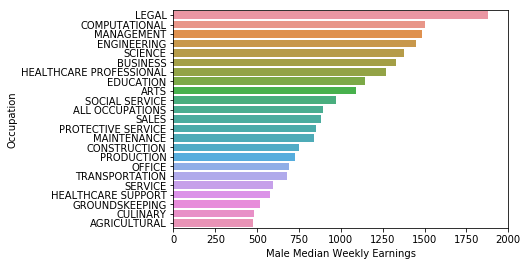

In [86]:
#Data Visualization: Plots of Male and Female Median Weekly Earnings

m_weekly_plot = sns.barplot(x = "M_weekly", y = "Occupation", data = dfsectors.sort_values("M_weekly", ascending = False))
m_weekly_plot.set(xlim = (0,2000), xlabel = "Male Median Weekly Earnings", ylabel = "Occupation" )



[Text(0,0.5,'Occupation'),
 (0, 2000),
 Text(0.5,0,'Female Median Weekly Earnings')]

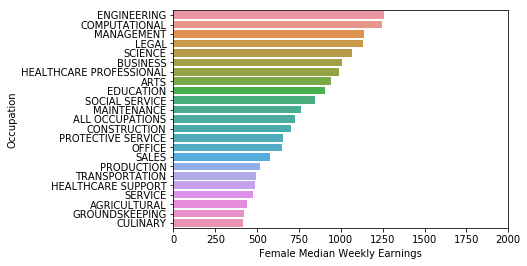

In [89]:
f_weekly_plot = sns.barplot(x = "F_weekly", y = "Occupation", data = dfsectors.sort_values("F_weekly", ascending = False))

f_weekly_plot.set(xlim = (0,2000), xlabel = "Female Median Weekly Earnings", ylabel = "Occupation" )